# ConvNN TransferLearning FlowersDataset

In this notebook we discuss about Transfer Learning.

We use the same dataset seen in the last notebook: the flowers dataset.

## IMPORTING LIBRARIES

We import the basic libraries.

In [1]:
import tensorflow as tf  

import matplotlib.pyplot as plt

import numpy as np

## LOAD THE DATASET

Let us load the flowers dataset. This time, the downloading and loading of the dataset is a little bit more tricky.

### Download the dataset

In [2]:
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'

data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)

### Load the dataset

We have already seen how to do that.

In [3]:
w, h = 180, 180
seed = 42
validation_split=0.2

batch_size = 32

# Loading the training set: train_ds
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=validation_split,
  subset='training',  # We want the training set
  seed=seed,
  image_size=(w, h),
  batch_size=batch_size)

# Loading the validation set: validation_ds
validation_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=validation_split,
  subset='validation',  # We want the validation set
  seed=seed,
  image_size=(w, h),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


As it can be seen, there are $2936$ instances in the training set, and $734$ in the validation set.

We can inspect the names of the classes.

In [4]:
train_ds.class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [5]:
class_names = train_ds.class_names

# TRANSFER LEARNING

Transfer learning is about taking an already trained model (trained in a specific scenario) and using it in our new specific problem: we transfer the model into out our specific problem.

Let's explain than more precisely in the context of DL, and especially of Convolutional NN.

### Idea

We have a specific classification problem, about a specific dataset about images. Like our specific classification problem about the flowers dataset.

Instead of building from scratch our Conv NN, with Conv part and Dense part, we transfer into our problem an already trained NN.

We take an already trained NN, that we call **base model**. This NN is a complex and sophisticated NN built from the community or important companies (e.g. Google) and it is trained with a huge dataset (dataset about images, of course). In our example, we will take the **MobileNet V2**, a Conv NN developed at Google, trained on the ImageNet dataset (a large dataset consisting of 14M images and 1000 classes).

So, we take this already trained NN (trained in a different dataset) and we use it for solving our specific problem about the flowers dataset.

### More precisely

How do we use the base model in our specific scenario?

We take only the Conv part of the base model: the Dense part is thrown away. (The Dense part is also called "the top").

We define a new ConvNN. 
- The Conv part of this NN is the Conv part of the base model. Basically, we take the Conv part of the base model, and we innestate it into our new NN.
- The Dense part is instead hand-designed from scratch. It is specifically designed for our specific context and scenario. Basically, it is important that the output layer (which is a dense layer) has a number of outputs which is equal to the number of different classes of our specific problem. For instance, in our specific case, the number of outputs must be equal to $5$, which is the number of different classes of flowers.

Basically, the Conv part is taken from the base model. The extraction of the interesting features from the images is done by the base model. This makes sense, since the base model is a very complex and sophisticated model, trained on a huge dataset. 

Instead, the Dense part is specifically designed for our specific problem. The exploitation of the extracted features is specifically designed for our specific problem.

### Weights 

Of course, the weigths of the base model are fixed.

So, when we train our NN, the Conv part (i.e. the base model) must be fixed, the weigths must be non-trainable. We want to keep the parameters of the base model are they are.

So, we train only the weigths of the Dense part.

We freeze the Conv part, while keeping free the Dense part.

### Advantages of this approach

This is, in general, a good approach. Because we rely upon a NN which is complex, sophisticated, trained on a huge dataset, and designed and controlled by a large community of researches (i.e. Google). 

Instead of building a new NN from scratch, we rely upon a reliable NN.

### Features extraction and Fine tuning

Actually, there are two different possible ways of using Transfer Learning. The classic one is the one described now, and it is called **Features extraction**. The alternative way is called **Fine tuning**: we will see it later. 

## NOTE: GLOBAL AVERAGE POOLING LAYER

Before continuing, let's see another kind of layer for the Conv NN: GlobalAveragePooling layer.

In [6]:
from tensorflow.keras.layers import GlobalAveragePooling2D

### Idea

The GlobalAveragePooling layer is like the AveragePooling layer. The difference is that it is applied on the whole image. It is applied covering the whole spatial dimensions.

So, for each channel, all the values in that image are taken, and the average of all these values is computed. Each channel is summed up into a single value, which is the mean of the values.

So, if the input dimensions of the layer are $w_{in},h_{in},c_{in}$, then the output is simply a flat vector containing $c_{in}$ values, one from each input channel.

There is also the GlobalMaxPooling layer.

### Usage

The usage of this layer is to flat the dimensions into a single dimension. It flats the $3$ dimensions fo the Conv layers (i.e. $w,h,c$) into a single dimension.

So, this layer is used for flattening the dimensions before the Dense part. It is placed after the Conv part and right before the Dense part, in order to give to the Dense part a flat input.

Basically, the GlobalAveragePooling layer is an alternative to the Flatten layer, for flattening the dimensions inton a single one.

## USING TRANSER LEARNING

So, let's use transfer learning in our classification problem about the flowers dataset.

### Take the base model

Let's take the base model `MobileNetV2`, using the TensorFlow library. We don't take the top (i.e. the Dense part). Only Conv part. 

We take this model trained on the ImageNet dataset.

In [7]:
# Input spatial dimensions
w, h = 180, 180

# Input channels dimension
c = 3

base_model = tf.keras.applications.MobileNetV2(input_shape=(w, h, c),
                                               include_top=False,
                                               weights='imagenet')

Summary.

In [8]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 90, 90, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 90, 90, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 90, 90, 32)   0           ['bn_Conv1[0][

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 23, 23, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 23, 23, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 23, 23, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 23, 23, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 12, 12, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 12, 12, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 12, 12, 384)  1536       ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 12, 12, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 12, 12, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 12, 12, 576)  2304       ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 12, 12, 576)  0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 6, 6, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 6, 6, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 6, 6, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 6, 6, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

We set the base model as non-trainable. We freeze it.

In [9]:
base_model.trainable = False

### Define the NN

Let's define the NN.

We use the base model as Conv part, while we design from scratch the Dense part. We also use the techniques for reducing overfitting seen in the last notebook: data augmentation (with flipping/rotating/zoomming) and DropOut.

So, the NN is the following.

- Input layer.
- Flipping, Rotating, Zoomming layers, for data augmentation.
- Rescaling layer, for rescaling the input values from the range $[0,255]$ into the range $[0,1]$.
- Base model. We inject the base model. This is the Conv part of our NN.
- GlobalAveragePooling layer, for flattening the 
- DropOut layer, which works on the last Conv layer.
- Dense layer.
- Output Dense layer. $5$ output neurons. Softmax activation function.

In [10]:
from tensorflow.keras.layers import Input, Dense, Conv2D, Rescaling, RandomFlip, RandomRotation, RandomZoom, Dropout
from tensorflow.keras.models import Model

In [11]:
# INPUT
xin = Input(shape=(180,180,3))

# RESCALING
x = Rescaling(1./255)(xin)

# DATA AUGMENTATION
x = RandomFlip("horizontal", input_shape=(180,180,3))(x)
x = RandomRotation(0.1, input_shape=(180,180,3))(x)
x = RandomZoom(0.1, input_shape=(180,180,3))(x)

# BASE MODEL: CONV PART
x = base_model(x, training=False)  # IMPORTANT: training=False

# FLATTENING
x = GlobalAveragePooling2D()(x)

# DROP OUT
x = Dropout(0.2)(x)

# DENSE PART
x = Dense(units=128, activation='relu')(x)
res = Dense(units=5)(x)

model = Model(xin, res)

Actually, as it can been noticed, no activation function has been specified to the output layer. This because we will use `SparseCategoricalCrossentropy` with `from_logits=True`.

### Important remark

As it will be noticed, in applying the base model we have specified `training=False`. This is important.

What does it do?

It is not related with the wights of the base model. They have already been specified as non-trainable before, with `base_model.trainable=False`.

Instead, the parameter `training=False` is about the statistical measures used by the BatchNormalization layers inside the base model. We are saying that these statistical measures don't have to change. They must be fixed.

### Summary

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 180, 180, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 180, 180, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 180, 180, 3)       0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 6, 6, 1280)       2257984   
 ional)                                                      

### Compiling

In [13]:
from tensorflow.keras.optimizers import Adam

In [14]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training

In [15]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
92/92 [==============================] - 33s 338ms/step - loss: 1.1830 - accuracy: 0.5334 - val_loss: 0.7573 - val_accuracy: 0.7425
Epoch 2/10
92/92 [==============================] - 36s 393ms/step - loss: 0.7229 - accuracy: 0.7411 - val_loss: 0.5980 - val_accuracy: 0.7984
Epoch 3/10
92/92 [==============================] - 34s 372ms/step - loss: 0.6093 - accuracy: 0.7759 - val_loss: 0.5384 - val_accuracy: 0.8120
Epoch 4/10
92/92 [==============================] - 34s 374ms/step - loss: 0.5319 - accuracy: 0.8048 - val_loss: 0.5307 - val_accuracy: 0.8120
Epoch 5/10
92/92 [==============================] - 34s 374ms/step - loss: 0.4726 - accuracy: 0.8283 - val_loss: 0.4836 - val_accuracy: 0.8365
Epoch 6/10
92/92 [==============================] - 35s 381ms/step - loss: 0.4392 - accuracy: 0.8426 - val_loss: 0.4767 - val_accuracy: 0.8270
Epoch 7/10
92/92 [==============================] - 34s 373ms/step - loss: 0.4195 - accuracy: 0.8484 - val_loss: 0.4659 - val_accuracy: 0.8365

### Analysis of the results

In [16]:
def plot_history(training_history, n_epochs):
    epochs = range(1,n_epochs+1)

    plt.plot(epochs, training_history.history['loss'], label='train_loss')
    plt.plot(epochs, training_history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of epochs')
    plt.title('Loss')

    plt.figure()
    plt.plot(epochs, training_history.history['accuracy'], label='train_accuracy')
    plt.plot(epochs, training_history.history['val_accuracy'], label='val_accuracy')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of epochs')
    plt.title('Accuracy')

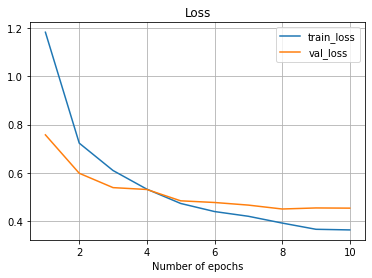

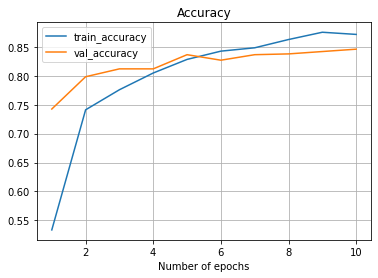

In [17]:
plot_history(history, n_epochs=10)

**Quite good!!! Better than the NNs that we defined in the last notebook from scratch!!!**

## FINE TUNING

Fine tuning is the other possible way of using Transfer Learning. (Alternative to the classic way, which is the so-called Features Extraction).

### Idea

In the classic usage of Transfer Learning, we completely freeze the whole Conv part, the whole base model. All the layers of the base model are non-trainable.

The idea of fine tuning is to unlock some of the last layers of the base model. We train again some of the last layers of the base model (i.e. of the Conv part).  We fine tune some of the last layers of the Conv part.

We do that beacuse we want to specialize a little bit the extraction of the features (i.e. the Conv part) to our specific problem , to our specific dataset. We want to be able to extract some features specific for our particular probolem and dataaset.

Why do we unlock the last layers, and not the first ones? Beacuse the first Conv layers extract basic features, which are good in general in any scenario. Low-level and general purpose features. While the last layers are the more high-level, They extract more high-level features, specific for our problem and dataset. 

### Risks

There are some risks in using Fine Tuning, that we must be aware of.

1. First of all, we have to be aware that, by re-training the last layers, we are completely losing the weights of these layers. We are completely losing the features extracted from these layers.

2. Secondly, and more importantly, by using Fine Tuning, there is a **high risk of overfitting**. Because we are adapting a very complex NN to our specific dataset. Even if we are unlocking only the last layers of the base model the risk of overfitting is high.

For reducing the risk of overfitting, typically a weaker optimizer (e.g. RMSprop) and a weaker learning rate are used.

## USING FINE TUNING

So, let's use Fine Tuning in our specific problem.

### Unlocking the last layers of the base model

Our base model has $154$ layers. We decide to unlock all the layers from the $100$-th one.

In [19]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  154


First of all, we put the base model as trainable.

In [18]:
base_model.trainable = True

Now we specify that all the layers of the base model up to the $100$-th layer are non-trainable.

For doing so, we access the field `layers` of the base model, which contains the list of all the layers in that NN.

In [20]:
# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

### Define the NN

Actually, we don't define a new NN. We use the same NN of before. We use the same NN `model`.

We simply have unlocked the last layers of the base model: the rest of the NN is the same.

### Compile the model 

As said before, we use a weaker optimizer and a weaker learning rate.

We use the `RMSprop` optimizer, and the learning rate $10^{-5}$ (i.e. $1/10$ with respect to before).

In [21]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4/10),  # Opt
              metrics=['accuracy'])

### Training the model

We do the training in an incremental way. Since we are using the same model, we start the training using the weigths obtained before. We don't reset the weigths obtained before, but we use them as a starting point. Incremental training.

In [22]:
initial_epochs = 10  # Number of epochs of the training of before
fine_tune_epochs = 10  # Number of epochs of this new training
total_epochs =  initial_epochs + fine_tune_epochs  # Total number of epochs

In [23]:
history_fineTuning = model.fit(train_ds, epochs=total_epochs, initial_epoch=initial_epochs, 
                               validation_data=validation_ds)

Epoch 11/20
92/92 [==============================] - 50s 521ms/step - loss: 0.3525 - accuracy: 0.8713 - val_loss: 0.4164 - val_accuracy: 0.8556
Epoch 12/20
92/92 [==============================] - 55s 599ms/step - loss: 0.2944 - accuracy: 0.8931 - val_loss: 0.3892 - val_accuracy: 0.8651
Epoch 13/20
92/92 [==============================] - 56s 607ms/step - loss: 0.2687 - accuracy: 0.8968 - val_loss: 0.3784 - val_accuracy: 0.8651
Epoch 14/20
92/92 [==============================] - 56s 609ms/step - loss: 0.2495 - accuracy: 0.9131 - val_loss: 0.4068 - val_accuracy: 0.8556
Epoch 15/20
92/92 [==============================] - 56s 608ms/step - loss: 0.2215 - accuracy: 0.9135 - val_loss: 0.3693 - val_accuracy: 0.8801
Epoch 16/20
92/92 [==============================] - 56s 612ms/step - loss: 0.2162 - accuracy: 0.9210 - val_loss: 0.3581 - val_accuracy: 0.8801
Epoch 17/20
92/92 [==============================] - 57s 617ms/step - loss: 0.1876 - accuracy: 0.9326 - val_loss: 0.3488 - val_accuracy:

### Analysis of the results

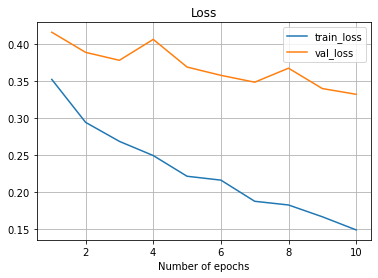

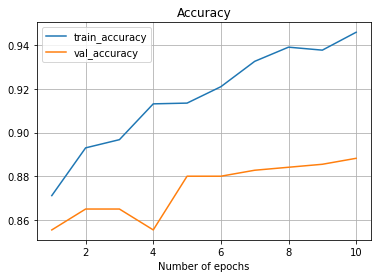

In [24]:
plot_history(history_fineTuning, n_epochs=fine_tune_epochs)

Now we want to visualize the results of the overall training, considering also the training of before.

For doing so, we add into the lists of results of the previous training (i.e. the lists `history['accuracy']`, `history['accuracy']`, `history['accuracy']`, `history['accuracy']` accessed through `history`) the corresponding lists of results of the current training (i.e. the lists `history['accuracy']`, `history['accuracy']`, `history['accuracy']`, `history['accuracy']` accessed through `history_fineTuning`) .

In [26]:
history.history['accuracy'] += history_fineTuning.history['accuracy']
history.history['val_accuracy'] += history_fineTuning.history['val_accuracy']

history.history['loss'] += history_fineTuning.history['loss']
history.history['val_loss'] += history_fineTuning.history['val_loss']

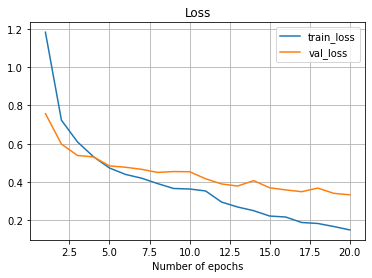

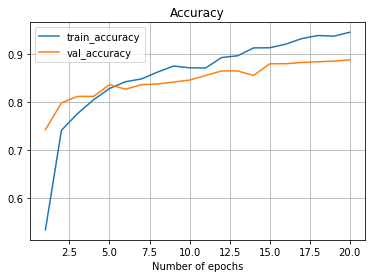

In [27]:
plot_history(history, n_epochs=total_epochs)

**Good results!!! Even better results than before!!! More stable results!!!**

**The base model is good in our specific problem and dataset. And, if we carefully fine tune it, even better results!!!**